In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Text(0.5, 1.0, 'Age distribution')

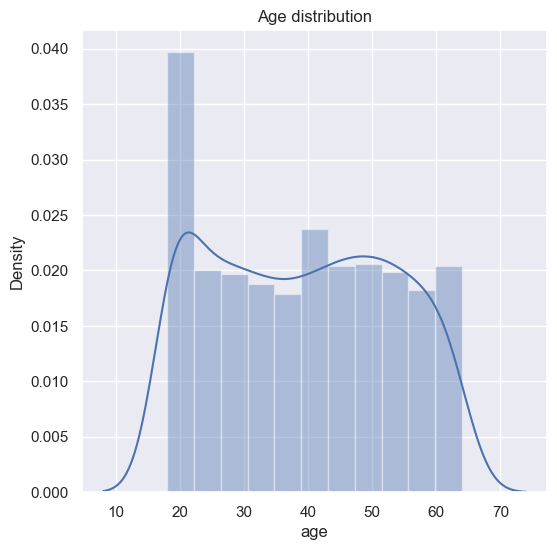

In [8]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age distribution')

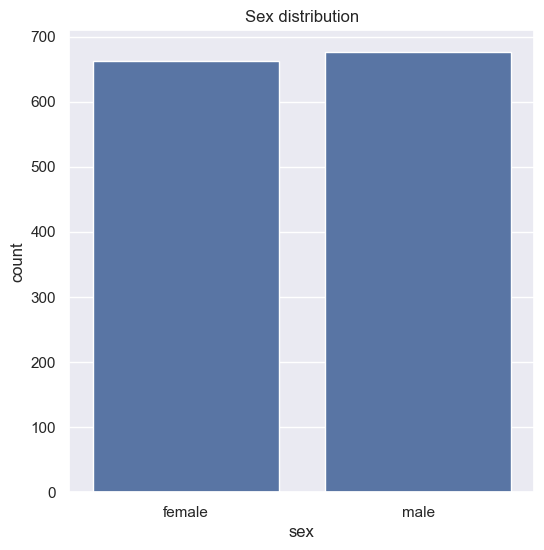

In [9]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=df)
plt.title('Sex distribution')
plt.show()

In [10]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

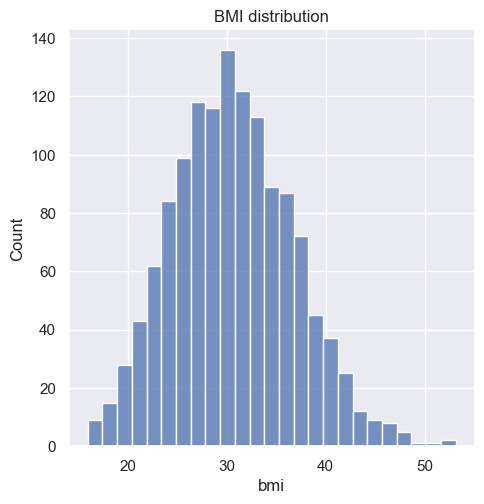

In [11]:
plt.figure(figsize=(6,6))
sns.displot(df['bmi'])
plt.title('BMI distribution')
plt.show()

normal is 18.5 to 24.5

Text(0.5, 1.0, 'Children')

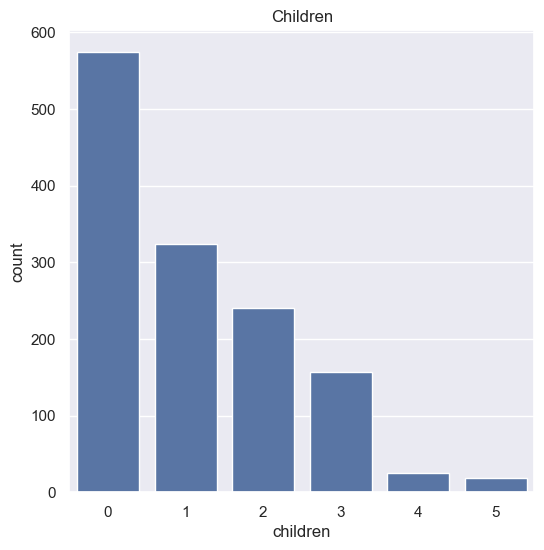

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=df)
plt.title('Children')

In [13]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

Text(0.5, 1.0, 'smoker')

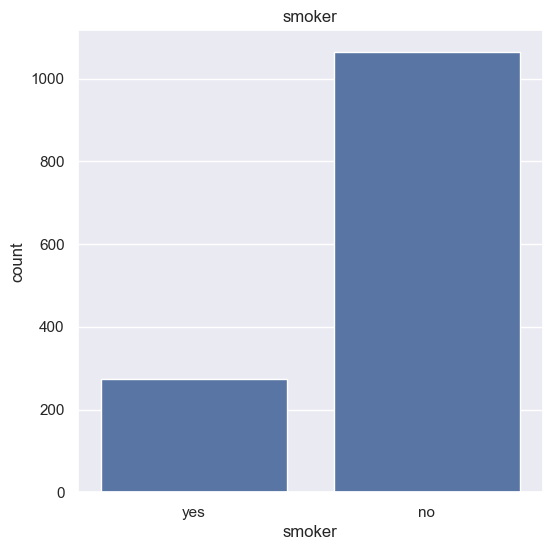

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=df)
plt.title('smoker')

In [15]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [16]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

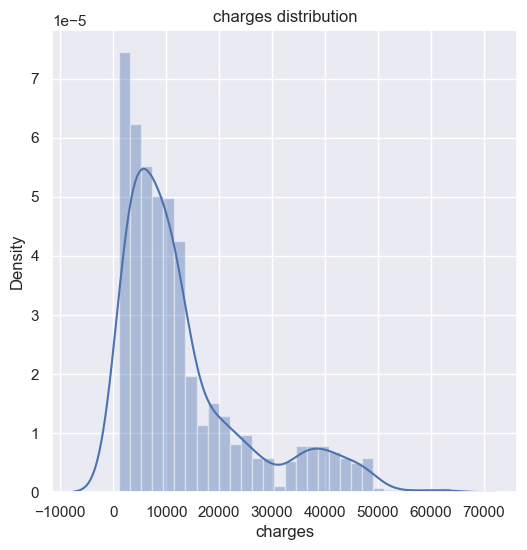

In [17]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('charges distribution')
plt.show()

In [18]:
df.replace({'sex':{'male':0,'female':1}},inplace=True)

In [19]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,no,northwest,10600.54830
1334,18,1,31.920,0,no,northeast,2205.98080
1335,18,1,36.850,0,no,southeast,1629.83350
1336,21,1,25.800,0,no,southwest,2007.94500


In [20]:
df.replace({'smoker':{'no':0,'yes':1}},inplace=True)

In [21]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


In [22]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [23]:
df.replace({'region':{'southwest':0,'southeast':1,'northwest':2,'northeast':3}},inplace=True)

In [24]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2,10600.54830
1334,18,1,31.920,0,0,3,2205.98080
1335,18,1,36.850,0,0,1,1629.83350
1336,21,1,25.800,0,0,0,2007.94500


In [25]:
x=df.drop('charges',axis=1)

In [26]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,0
1,18,0,33.770,1,0,1
2,28,0,33.000,3,0,1
3,33,0,22.705,0,0,2
4,32,0,28.880,0,0,2
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2
1334,18,1,31.920,0,0,3
1335,18,1,36.850,0,0,1
1336,21,1,25.800,0,0,0


In [27]:
y=df['charges']

In [28]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [30]:
lr=LinearRegression()

In [31]:
lr.fit(x_train,y_train)

LinearRegression()

In [32]:
y_pred=lr.predict(x_test)
r2_score=metrics.r2_score(y_test,y_pred)

In [33]:
r2_score

0.7445422986536503

PREDICTING SYSTEM

'sex':{'male':0,'female':1}

{'region':{'southwest':0,'southeast':1,'northwest':2,'northeast':3}


{'smoker':{'no':0,'yes':1}

In [35]:
a=float(input("enter the age: "))
b=float(input("enter the sex (male:0,female:1): "))
c=float(input("enter the bmi: "))
d=float(input("enter the children: "))
e=float(input("enter the smoker (no:0,yes:1): "))
f=float(input("enter the region (southwest:0,southeast:1,northwest:2,northeast:3) : "))

input_data=(a,b,c,d,e,f)

input_data_as_numpy_array=np.asarray(input_data)



input_data_reshape=input_data_as_numpy_array.reshape(1,-1)


prediction=lr.predict(input_data_reshape)


print("The medical insurance price will be around : ",prediction,"$")

enter the age:  78
enter the sex (male:0,female:1):  0
enter the bmi:  45.8
enter the children:  2
enter the smoker (no:0,yes:1):  0
enter the region (southwest:0,southeast:1,northwest:2,northeast:3) :  0


The medical insurance price will be around :  [23179.82047921] $
